In [1]:
## importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## LOAD DATASET

In [2]:
val =pd.read_csv("Churn_Modelling.csv")

In [3]:
val.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
val.shape

(10000, 14)

## VISUALIZATION

## UNI VARIATE ANALYSIS

In [5]:
val['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

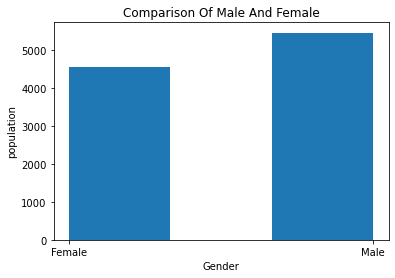

In [6]:
plt.hist(x = val.Gender, bins = 3)
plt.title('Comparison Of Male And Female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

C:\Users\Anisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gender'>

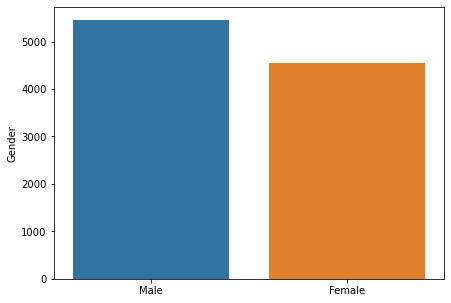

In [19]:
plt.figure(figsize=(7,5))
sns.barplot (val.Gender.value_counts().index , val.Gender.value_counts())

([<matplotlib.patches.Wedge at 0x238cce11670>,
 [Text(-0.18600153989819715, 1.2866248198894266, 'male'),
  Text(0.1573859183753977, -1.088682539906438, 'female')],
 [Text(-0.11446248609119825, 0.7917691199319549, '54.6%'),
  Text(0.08584686456839873, -0.5938268399489661, '45.4%')])

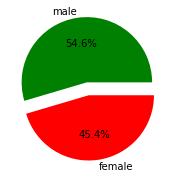

In [8]:
plt.figure(figsize=(5,3))
plt.pie(val.Gender.value_counts(),[0.2,0],labels=['male','female'],autopct="%1.1f%%",colors=['green','red'])

In [9]:
val['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

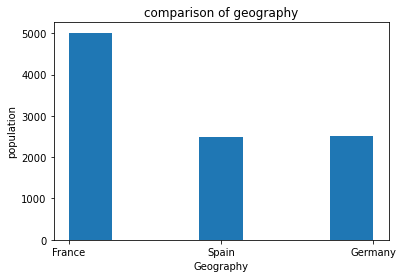

In [10]:
plt.hist(x = val.Geography, bins = 7)
plt.title('comparison of geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

C:\Users\Anisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

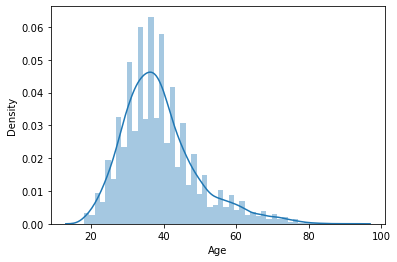

In [11]:
sns.distplot(val.Age)

C:\Users\Anisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exited', ylabel='Density'>

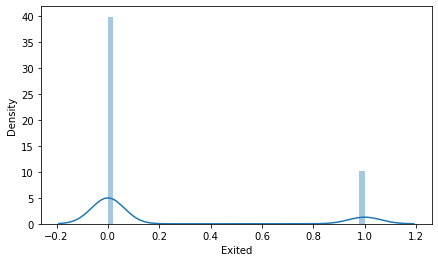

In [12]:
plt.figure(figsize=(7,4))
sns.distplot(val.Exited)

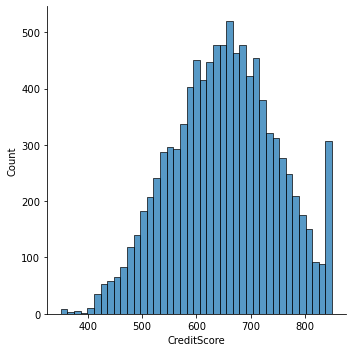

In [13]:
sns.displot(x=val.CreditScore)

## BI VARIATE

C:\Users\Anisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Exited'>

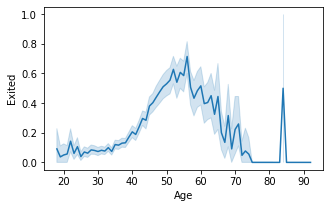

In [20]:
plt.figure(figsize=(5,3))
sns.lineplot(val.Age,val.Exited)

In [ ]:
sns.displot(val, x="Age", col="Gender",hue = 'Exited', multiple="dodge")

In [ ]:

val.head()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x= 'HasCrCard', y= 'EstimatedSalary', data = val, hue = 'Exited')
plt.subplot(1,2,2)
sns.barplot(x= 'HasCrCard', y= 'CreditScore', data = val, hue = 'Exited') 

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(val.Age,val.Exited)

## MULTI - VARIATE ANALYSIS

In [ ]:
val.hist(figsize=(10,10))

## DESCRIPTIVE STATISTICS

In [ ]:
val.describe()

## CHECKING MISSING VALUES

In [ ]:
val.isnull().any()

## REMOVING UNNECESSARY DATAS FROM DATASET

In [ ]:
val = val.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)
val.columns

In [ ]:
val.shape

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(val.corr(),annot=True)

In [ ]:
val[['Exited','Age']].groupby('Exited').mean()

## Find the outliers and replace the outliers

In [ ]:
sns.boxplot(val.Age)

In [ ]:
p99= val.Age.quantile(0.99)
p99

In [ ]:
val=val[val.Age<=p99]

In [ ]:
sns.boxplot(val.Age)

In [ ]:
val.info()

## SPLITTING THE DATASET INTO X= INDEPENDENT VARIABLES AND Y = DEPENDENT VARIABLES

In [ ]:
x = val.iloc[:,0:10]
y = val.iloc[:,10]

In [ ]:
x.shape

In [ ]:
x.head()

In [ ]:
y.shape

In [ ]:
y

## PERFORM ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
# The categorical columns are:

val.Geography=le.fit_transform(val.Geography)
val.Gender=le.fit_transform(val.Gender)

In [ ]:
x = pd.get_dummies(x)
x.head()

## SCALING

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

## SPLIT THE DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape